### Data Loading

In [990]:
# set the directory to where the data is
import os

os.chdir(r"D:\Gene_Project")

In [991]:
# pandas for dealing with the data
import pandas as pd
# setting for seeing the entire string
pd.options.display.max_colwidth = None
pd.set_option('display.max_rows', 500)

In [992]:
# load the data - new data that was provided
data = pd.read_csv(r"pul_seq_low_high_substr_year_corrected.tsv", sep = "\t")

In [993]:
# take a look
data.head()

,PULid,sig_gene_seq,low_level_substr,high_level_substr,Pub_year
0,PUL0001,"GH1,8.A.49,CE2,GH130,GH130,3.A.1,3.A.1,SBP_bac_1,LacI,GH36,GH113",beta-mannan,beta-mannan,2019
1,PUL0002,GH16,lichenan,beta-glucan,1996
2,PUL0003,"GH30_8,GH43_16|CBM6",xylan,xylan,2016
3,PUL0004,"4.A.1,GH1","glucose,cellobiose,maltose",multiple_substrates,2016
4,PUL0005,"GH94,GH3","beta-glucan,sophorose,laminaribiose",multiple_substrates,2016


### Data Sanity check

In [994]:
data[data.isnull().sum(axis = 1).astype(bool)]

,PULid,sig_gene_seq,low_level_substr,high_level_substr,Pub_year
75,PUL0076,NaN,"capsule polysaccharide,outer core capsule polysaccharide",multiple_substrates,2019


In [995]:
# remove this row
data = data.dropna()

In [996]:
# there are some rows which do not have a high level substr
data[data["high_level_substr"] == "-"]

,PULid,sig_gene_seq,low_level_substr,high_level_substr,Pub_year
35,PUL0036,"8.A.3,1.B.18,PL12,GT4,9.B.18,Aminotran_1_2,9.B.18",emulsan,-,2001
227,PUL0229,"HTH_AraC,8.A.59,3.A.1,3.A.1,3.A.1,GH67,GH10,GH43_12",aldouronate,-,2007
285,PUL0287,"MarR,4.A.3,4.A.3,GH1,4.A.3",unknown polysaccharide,-,2012
317,PUL0320,"PL11|CBM3,CBM66|PL3_1,CBM66|PL9_1,HTH_AraC,GH10|CBM3|CBM3|GH48,GH5_8|CBM3|CBM3|GH44,GH74|GH74|GH74|GH74|CBM3|CBM3|GH48,GT39,GH9|CBM3|CBM3|CBM3|GH5_8,GH5_8|CBM3|CBM3|CBM3|GH5_1,GH9|CBM3|CBM3|CBM3|GH48",glucan,-,"2018,2018"
319,PUL0322,"PL11|CBM3,CBM66|PL3_1,CBM66|PL9_1,CBM66|PL9_1,CBM66|PL9_1,HTH_AraC,GH74|GH74|GH74|GH74|CBM3|CBM3|GH48,GT39,GH9|CBM3|CBM3|CBM3|GH5_8,CBM22|CBM22|GH10|CBM3|CBM3|GH5_1,GH10|CBM3|GH12|GH48,GH5_8|CBM3|CBM3|GH44,GH9|CBM3|CBM3|CBM3|GH48",glucan,-,2018
344,PUL0347,"HTH_AraC,2.A.1,MarR,Glyoxalase,2.A.1,GH13_11",sorbitol,-,2014
406,PUL0409,"SIS|CBS,8.A.4,1.B.18,9.A.41,9.A.41,GT38,3.A.1,3.A.1",polysialic acid,-,2011
431,PUL0434,"CBM4|GH9,GH9,GH5_17,CBM4|GH9,CBM4,2.A.69",mannooligosaccharide,-,2000
451,PUL0454,"GH13_13|CBM41|CBM41,3.A.1,GT5,NUDIX,GT5,GH77,PfkB,GH13_13|CBM41|CBM41,GH13_2|CBM20",acarbose,-,2013


In [997]:
# remove these no class rows as well
data = data[data["high_level_substr"] != "-"].reset_index(drop = True)

### Exploratory Data Analysis

In [998]:
# get the frequency counts
D = data.high_level_substr.value_counts()

In [999]:
# convert to a dictionary
D = dict(D)

In [1000]:
# import the plotting packages
import matplotlib as mpl
import matplotlib.pyplot as plt

In [1001]:
# some parameters for improved plotting aesthetics
mpl.rcParams['xtick.labelsize'] = 15 
plt.rcParams["font.weight"] = "bold"

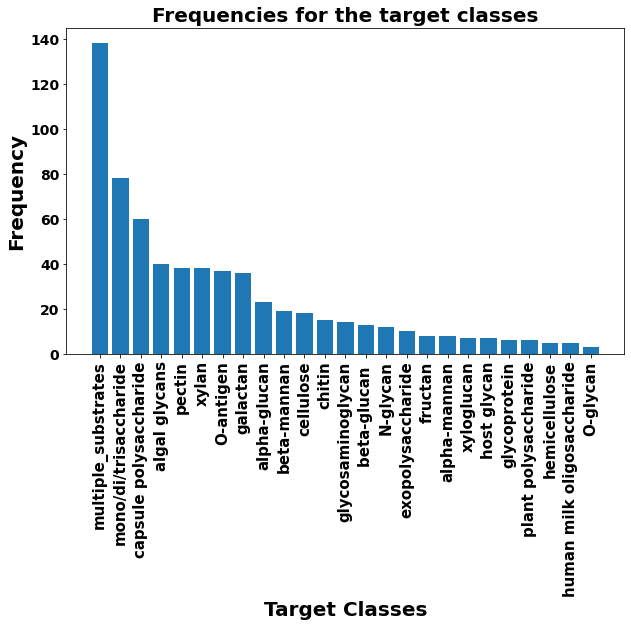

In [1002]:
# define the plotting area
plt.figure(figsize = (10,6))
# need a bar plot
plt.bar(range(len(D)), list(D.values()), align='center')
# put the labels but rotate them
plt.xticks(range(len(D)), list(D.keys()), rotation = 90, weight = "bold")
# increase the ticks on y
plt.yticks(fontsize=14)
# give labels to x
plt.xlabel("Target Classes", weight = "bold", fontsize = 20)
# give labels to y
plt.ylabel("Frequency", weight = "bold", fontsize = 20)
# put the title
plt.title("Frequencies for the target classes", weight = "bold", fontsize = 20)
plt.show()

In [1003]:
# collect all the genes from each sequence
all_genes_per_sequence = [str(seq).split(",") for seq in data["sig_gene_seq"]]
# loop over the list of genes and flatten it
all_genes = [gene for list_genes in all_genes_per_sequence for gene in list_genes]

In [1004]:
# import numpy to deal with arrays
import numpy as np

In [1005]:
# import counter function
from collections import Counter

In [1006]:
# get the frequency counts
freq_count = Counter(all_genes)

In [1007]:
# sort in descending order
D =dict(sorted(freq_count.items(), key=lambda item: item[1], reverse = True))

In [1008]:
# manipulate for plotting
first2pairs = {k: D[k] for k in list(D)}

In [1009]:
# variable assignment
D = first2pairs

In [1010]:
# some parameters for improved plotting aesthetics
mpl.rcParams['xtick.labelsize'] = 15 
plt.rcParams["font.weight"] = "bold"

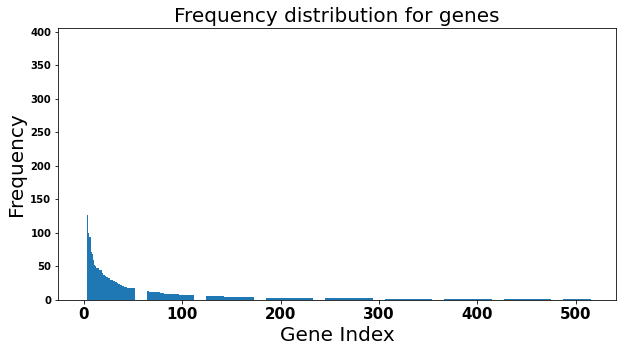

In [1011]:
plt.figure(figsize = (10,5))
plt.bar(range(len(D)), list(D.values()), align='center')
plt.title("Frequency distribution for genes", fontsize = 20)
plt.xlabel("Gene Index", fontsize = 20)
plt.ylabel("Frequency", fontsize = 20)
plt.show()

In [1012]:
# visualize the cdf
cdf_vec = np.cumsum(list(D.values()))/np.cumsum(list(D.values()))[-1]

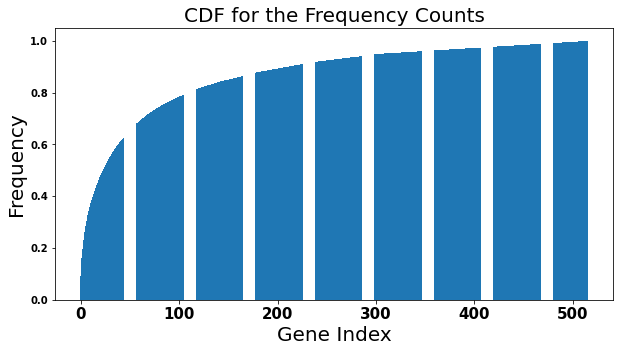

In [1013]:
# make the plot for the cdf
plt.figure(figsize = (10,5))
plt.bar(range(len(cdf_vec)), cdf_vec, align='center')
plt.title("CDF for the Frequency Counts", fontsize = 20)
plt.xlabel("Gene Index", fontsize = 20)
plt.ylabel("Frequency", fontsize = 20)
plt.show()


### Prediction Models

#### read in the metadata available

In [1014]:
# read the signature gene reference data
sig_gene_reference = pd.read_csv(r"signature_gene_reference.tsv", sep = "\t", header = None)

In [1015]:
# name the columns
sig_gene_reference.columns = ["category", "gene"]

In [1016]:
# first few rows of the data
sig_gene_reference.head()

,category,gene
0,CAZyme,AA0
1,CAZyme,AA10
2,CAZyme,AA1_3
3,CAZyme,AA2
4,CAZyme,AA3


In [1017]:
# what are the distinctive categories
sig_gene_reference["category"].value_counts()

TC        525
CAZyme    499
STP       176
TF         47
Name: category, dtype: int64

In [1018]:
# write a function to map the genes to the category
def map_genes_to_categories(sequence): 
    # instantiate an empty string
    category_sequence = ""
    # the category data has individual genes like A and B and not A|B
    # thus to have all the genes mapped we would need to replace "|" by ","
    
    # replace "|" with a "," and then split on the ","
    # iterate over all those genes
    for gene in str(sequence).replace("|", ",").split(","):
        # map out the category reference for the gene
        categories = sig_gene_reference[sig_gene_reference["gene"] == gene]["category"].values
        # sometimes one gene can have different categories
        # in such a case loop over the multiple categories found
        for i in categories: 
            # iteratively add to the empty string
#             if len(i) > 0:
            category_sequence = category_sequence + "," + i
    # there would be a weird comma at the very start character
    # remove that and keep the rest
    return category_sequence[1:]

In [1019]:
from tqdm.notebook import tqdm

In [1020]:
category_sequence = []
for sequence in tqdm(data["sig_gene_seq"].values): 
    category_sequence.append(map_genes_to_categories(sequence))

  0%|          | 0/644 [00:00<?, ?it/s]

In [1021]:
data["category_sequence"] = category_sequence

In [1022]:
data.head()

,PULid,sig_gene_seq,low_level_substr,high_level_substr,Pub_year,category_sequence
0,PUL0001,"GH1,8.A.49,CE2,GH130,GH130,3.A.1,3.A.1,SBP_bac_1,LacI,GH36,GH113",beta-mannan,beta-mannan,2019,"CAZyme,CAZyme,CAZyme,CAZyme,TC,TC,STP,STP,TF,CAZyme,CAZyme"
1,PUL0002,GH16,lichenan,beta-glucan,1996,CAZyme
2,PUL0003,"GH30_8,GH43_16|CBM6",xylan,xylan,2016,"CAZyme,CAZyme,CAZyme"
3,PUL0004,"4.A.1,GH1","glucose,cellobiose,maltose",multiple_substrates,2016,"TC,CAZyme"
4,PUL0005,"GH94,GH3","beta-glucan,sophorose,laminaribiose",multiple_substrates,2016,"CAZyme,CAZyme"


In [1023]:
# import the requisite packages
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.ensemble import RandomForestClassifier

In [1024]:
# generic function that takes in the data and number of classes
def model_by_classes(num_classes, data, both = False, split_on_bar = False): 
    # get the frequency counts
    all_classes = list(data.high_level_substr.value_counts().keys())
    # remove multiple substrates
#     all_classes = [classes for classes in all_classes if classes not in ["multiple_substrates"]]
    # suppose using the top 2
    keep_these_many = num_classes
    # top_k_classes
    top_k = all_classes[:keep_these_many]
    # not top two
    not_top_k = [target for target in all_classes if target not in top_k]
    # get the data for the top k classes
    top_k_data = data[data.high_level_substr.isin(top_k)].reset_index(drop = True)
    # get the data for the non top_k classes
    not_top_k_data = data[data.high_level_substr.isin(not_top_k)].reset_index(drop = True)
    # give the same label to all the targets of the not_top_k_data
    not_top_k_data["high_level_substr"] = "others"
    # stack the top k and the not top k data together
    all_data = pd.concat([top_k_data, not_top_k_data], ignore_index = True)
    
    if split_on_bar == False:
        # instantiate the vectorizer again
        vectorizer = CountVectorizer(tokenizer=lambda x: str(x).split(','), lowercase = False)
    
    else: 
        vectorizer = CountVectorizer(tokenizer=lambda x: str(x).replace("|", ",").split(','), lowercase = False)
    
    
    # class weights
    class_weights = dict(1/(all_data["high_level_substr"].value_counts()/all_data["high_level_substr"].value_counts().cumsum()[-1]))
    
    
    # pipeline
    clf = Pipeline([('countvectorizer',vectorizer),('rf',RandomForestClassifier(n_jobs = 6, class_weight = class_weights))])
    # Parameters of pipelines can be set using ‘__’ separated parameter names:
    param_grid = {
    'countvectorizer__min_df': [1,2],
    'rf__n_estimators': [100,200,400], 
    'rf__max_features': ["auto", "log2"]
    }
    # fit the search
    search = GridSearchCV(clf, param_grid, n_jobs=7 , verbose = 3, cv = 5, scoring = "accuracy")
    
    # if both gene seq and category seq
    
    if both == True: 
        # fit the grid search
        search.fit(all_data["sig_gene_seq"] + "," + all_data["category_sequence"], all_data["high_level_substr"])
    else: 
        search.fit(all_data["sig_gene_seq"], all_data["high_level_substr"])
    # best score
    best_score = search.best_score_
    # std error
    std_accuracy = search.cv_results_['std_test_score'][np.argmax(search.cv_results_['mean_test_score'])]
    vectorizer.fit_transform(all_data["sig_gene_seq"])
    print(len(vectorizer.vocabulary_))
    return num_classes, best_score, std_accuracy, search.best_estimator_, top_k, not_top_k, vectorizer

In [1025]:
# functions that can help us do parallel computation
from joblib import Parallel, delayed

#### Using both gene and category data and splitting on bar ("|")

In [1026]:
# preprocessor
from sklearn.feature_extraction.text import CountVectorizer

In [1027]:
# run the function in parallel
all_results = Parallel(n_jobs=7, verbose = 2)(delayed(model_by_classes)(i, data, True, True) for i in range(1, 10))

# filter
all_results = [ar[:3] for ar in all_results]

# get the error ranges
err_ranges = np.array(all_results)[:,2]*3

# put everything in a dataframe
df = pd.DataFrame(all_results)

# give column names
df.columns = ["num_classes", "mean_accuracy", "std_error_accuracy"]

[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done   6 out of   9 | elapsed:   54.8s remaining:   27.4s
[Parallel(n_jobs=7)]: Done   9 out of   9 | elapsed:  1.4min finished


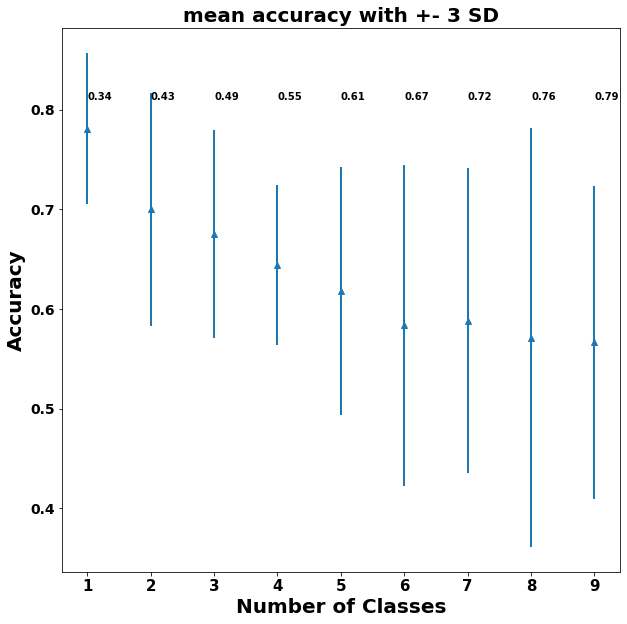

In [1028]:
# how much data do these classes cover
coverage = pd.DataFrame(data.high_level_substr.value_counts().cumsum()/data.high_level_substr.value_counts().cumsum()[-1])["high_level_substr"].values[1:10]

# round the coverage
coverage = np.round(coverage,2).astype(str)

# create a plot
plt.figure(figsize = (10,10))
plt.errorbar(df["num_classes"],np.array(all_results)[:,1], 
             err_ranges, linestyle='None', marker='^', linewidth = 2)
plt.xlabel("Number of Classes", weight = "bold", fontsize = 20)
plt.ylabel("Accuracy", weight = "bold", fontsize = 20)
plt.yticks(fontsize=14)
plt.xticks(df["num_classes"])
counter = 1
plt.title("mean accuracy with +- 3 SD", weight = "bold", fontsize = 20)
for text in coverage: 
    plt.text(counter, .81, text)
    counter+=1
plt.show()

In [1029]:
# make a new column for coverage
df["coverage"] = coverage

df["num_classes"] = df["num_classes"]  + 1

df

,num_classes,mean_accuracy,std_error_accuracy,coverage
0,2,0.781105,0.025299,0.34
1,3,0.700291,0.038938,0.43
2,4,0.675509,0.034774,0.49
3,5,0.644428,0.026777,0.55
4,6,0.617975,0.041487,0.61
5,7,0.583794,0.053634,0.67
6,8,0.588433,0.050916,0.72
7,9,0.571294,0.070038,0.76
8,10,0.566667,0.052255,0.79


#### Now with train test split

In [1093]:
# import train test split
from sklearn.model_selection import train_test_split

In [1094]:
# make a train and test set
X_train, X_test, y_train, y_test = train_test_split( data[["sig_gene_seq", "category_sequence"]], data["high_level_substr"],
                                                    test_size=0.30, random_state=42, stratify = data["high_level_substr"])

In [1095]:
data_train = pd.concat([pd.DataFrame(X_train.values), pd.DataFrame(y_train.values)], ignore_index = True, axis = 1)

In [1096]:
data_train.columns = ["sig_gene_seq", "category_sequence" ,"high_level_substr"]

In [1097]:
# use the function with 6 classes and only train data
num_classes, best_score, std_accuracy, best_estimator_, top_k, not_top_k, vectorizer = model_by_classes(5, data_train, True, True)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
377


In [1098]:
# column change the original targets to top 6 + unknown
targets_train = [target if target in top_k else "others" for target in data_train["high_level_substr"]]

In [1099]:
len(targets_train)

450

In [1100]:
data_train.shape

(450, 3)

In [1101]:
best_estimator = best_estimator_

In [1102]:
# refit this best estimator
best_estimator.fit(np.array(X_train), np.array(targets_train))

Pipeline(steps=[('countvectorizer',
                 CountVectorizer(lowercase=False,
                                 tokenizer=<function model_by_classes.<locals>.<lambda> at 0x000001A897EF2B80>)),
                ('rf',
                 RandomForestClassifier(class_weight={'algal glycans': 16.071428571428573,
                                                      'capsule polysaccharide': 10.714285714285714,
                                                      'mono/di/trisaccharide': 8.181818181818182,
                                                      'multiple_substrates': 4.6875,
                                                      'others': 2.227722772277228,
                                                      'xylan': 16.666666666666668},
                                        max_features='log2', n_estimators=400,
                                        n_jobs=6))])

In [1103]:
# get the predictions for test
y_test_pred = best_estimator.predict(np.array(X_test))

In [1104]:
# column change the original targets to top 6 + unknown
targets_test = [target if target in top_k else "others" for target in y_test]

In [1105]:
from sklearn.metrics import confusion_matrix

In [1106]:
len(targets_test)

194

In [1043]:
# get the array oaf confusion matrix
cm = confusion_matrix(targets_test, y_test_pred, normalize = 'true')

In [1044]:
# dataframe for confusion matrix
df_cm = pd.DataFrame(cm, index = [i for i in best_estimator.classes_],
                  columns = [i for i in best_estimator.classes_])

In [1045]:
# seaborn that helps with aesthetically pleasing plots
import seaborn as sns

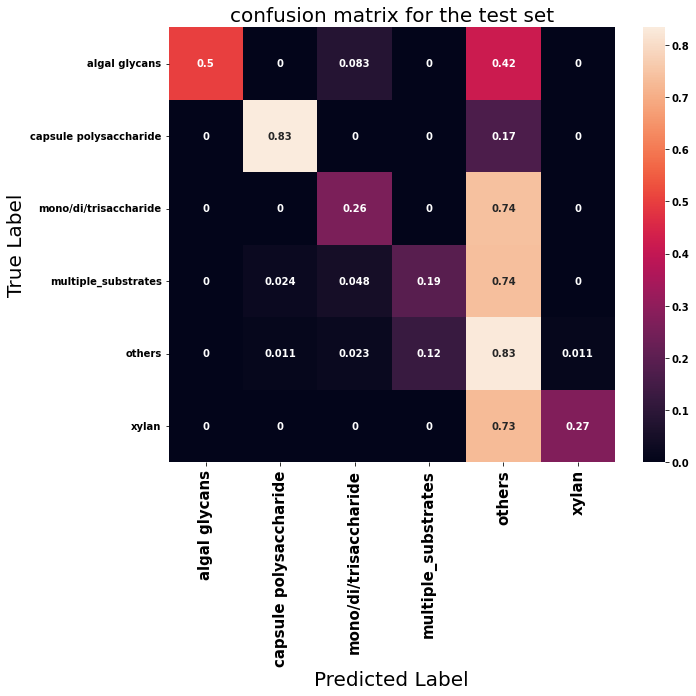

In [1046]:
# make the plot
plt.figure(figsize = (10, 8))
sns.heatmap(df_cm, annot = True)
plt.title("confusion matrix for the test set", fontsize = 20)
plt.xlabel("Predicted Label", fontsize = 20)
plt.ylabel("True Label", fontsize = 20)
plt.show()


In [1047]:
from sklearn.metrics import accuracy_score

In [1048]:
accuracy_score(targets_test, y_test_pred)

0.5721649484536082

In [1049]:
top_k

['multiple_substrates',
 'mono/di/trisaccharide',
 'capsule polysaccharide',
 'algal glycans',
 'xylan']

#### Try reduced classification

In [1629]:
# classes to keep
to_keep_classes = top_k

In [1630]:
# loop over all these classes and keep all those 
catch = []
for classes in to_keep_classes:
    filtered_df = data[data["high_level_substr"] == classes]
    low_level_freq = filtered_df["low_level_substr"].value_counts()
    to_keep = [k for k, v in low_level_freq.items() if v >= 12]
    filtered_df = filtered_df[filtered_df["low_level_substr"].isin(to_keep)]
    catch.append(filtered_df)

In [1631]:
filtered_df = pd.concat(catch)

In [1632]:
other_df = data[~data.index.isin(filtered_df.index)]

In [1633]:
not_keep_df = other_df[~other_df["high_level_substr"].isin(to_keep_classes)]

In [1634]:
not_keep_df["high_level_substr"] = "others"

C:\Users\vedpi\AppData\Local\Temp/ipykernel_14428/3001469651.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_keep_df["high_level_substr"] = "others"


In [1635]:
combined_df = pd.concat([filtered_df[["sig_gene_seq", "category_sequence" ,"high_level_substr"]], 
           not_keep_df[["sig_gene_seq", "category_sequence" ,"high_level_substr"]]]).sample(frac = 1.0)

In [1636]:
combined_df.shape

(443, 3)

In [1058]:
# from sklearn.preprocessing import LabelEncoder

In [1059]:
# le = LabelEncoder()

In [1637]:
combined_df["high_level_substr"].value_counts()

others                    290
capsule polysaccharide     60
mono/di/trisaccharide      26
xylan                      25
algal glycans              21
multiple_substrates        21
Name: high_level_substr, dtype: int64

In [1638]:
X_train, X_test, y_train, y_test = train_test_split(combined_df[["sig_gene_seq", "category_sequence"]],
                                                    combined_df["high_level_substr"], 
                                                   test_size = 0.3, stratify = combined_df["high_level_substr"])

In [1639]:
from sklearn.feature_extraction.text import CountVectorizer

In [1640]:
vectorizer = CountVectorizer(tokenizer=lambda x: str(x).replace("|", ",").split(','), lowercase = False)

In [1641]:
vectorizer.fit(X_train["sig_gene_seq"] + "," + X_train["category_sequence"])

C:\Users\vedpi\anaconda3\envs\newone\lib\site-packages\sklearn\feature_extraction\text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


CountVectorizer(lowercase=False,
                tokenizer=<function <lambda> at 0x000001AA767AFD30>)

In [1642]:
X_train = vectorizer.transform(X_train["sig_gene_seq"] + "," + X_train["category_sequence"])

In [1643]:
X_test = vectorizer.transform(X_test["sig_gene_seq"] + "," + X_test["category_sequence"])

In [1644]:
from sklearn.ensemble import RandomForestClassifier

In [1645]:
class_weights = dict(1/(y_train.value_counts()/y_train.value_counts().cumsum()[-1]))

In [1646]:
rf = RandomForestClassifier(n_jobs = 6, class_weight = class_weights)

In [1647]:
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight={'algal glycans': 20.666666666666668,
                                     'capsule polysaccharide': 7.3809523809523805,
                                     'mono/di/trisaccharide': 17.22222222222222,
                                     'multiple_substrates': 20.666666666666668,
                                     'others': 1.5270935960591134,
                                     'xylan': 18.235294117647058},
                       n_jobs=6)

In [1648]:
y_test_pred = rf.predict(X_test)

In [1649]:
import numpy as np

In [1650]:
from sklearn.metrics import confusion_matrix

In [1651]:
len(y_test)

133

In [1652]:
# get the array oaf confusion matrix
cm = confusion_matrix(y_test, y_test_pred, normalize = 'true')

In [1653]:
# dataframe for confusion matrix
df_cm = pd.DataFrame(cm, index = [i for i in rf.classes_],
                  columns = [i for i in rf.classes_])

In [1654]:
# seaborn that helps with aesthetically pleasing plots
import seaborn as sns

In [1655]:
import matplotlib.pyplot as plt

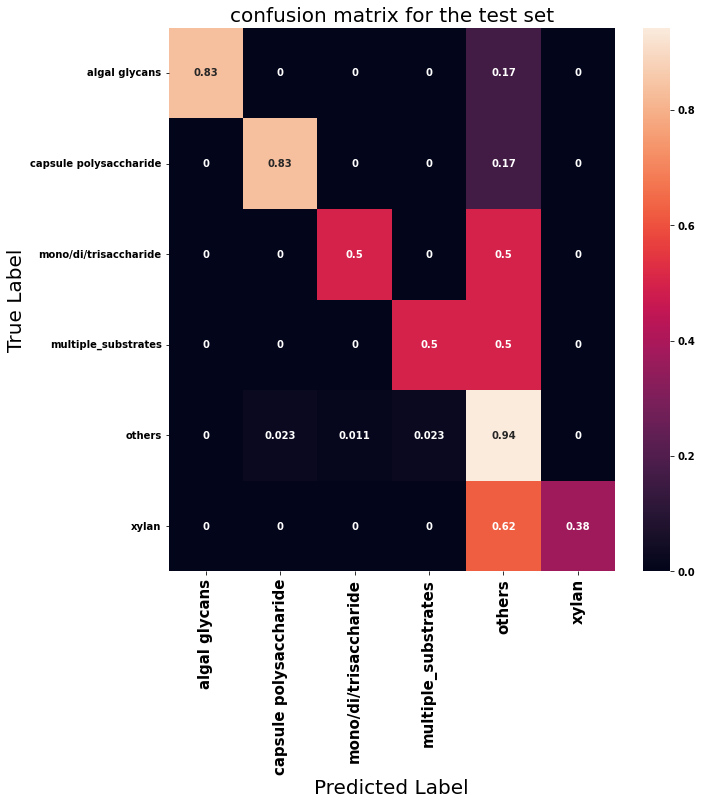

In [1656]:
# make the plot
plt.figure(figsize = (10, 10))
sns.heatmap(df_cm, annot = True)
plt.title("confusion matrix for the test set", fontsize = 20)
plt.xlabel("Predicted Label", fontsize = 20)
plt.ylabel("True Label", fontsize = 20)
plt.show()


In [1166]:
accuracy_score(y_test, y_test_pred)

0.825

#### demonstration of Metric Learning Idea

In [1089]:
# get the classes we are not handling


In [1197]:
not_top_k = [classes for classes in np.unique(data["high_level_substr"]) if classes not in top_k]

In [1198]:
# get those data from the test data
not_top_k_data = data[data.high_level_substr.isin(not_top_k)].reset_index(drop = True)

In [1199]:
not_top_k_data.shape

(290, 6)

In [1200]:
to_keep = not_top_k_data["high_level_substr"].value_counts()[:11].keys()

In [1201]:
not_top_k_data = not_top_k_data[not_top_k_data["high_level_substr"].isin(to_keep)]

In [1202]:
X_train, X_test, y_train, y_test = train_test_split(not_top_k_data[["sig_gene_seq", "category_sequence"]],
                                                    not_top_k_data["high_level_substr"], 
                                                   test_size = 0.3, stratify = not_top_k_data["high_level_substr"])

In [1203]:
from metric_learn import NCA

In [1204]:
from sklearn.preprocessing import FunctionTransformer

In [1205]:
X_train = X_train["sig_gene_seq"] + "," + X_train["category_sequence"]

In [1206]:
X_test = X_test["sig_gene_seq"] + "," + X_test["category_sequence"]

In [1207]:
# classifier again
clf = Pipeline([('countvectorizer', CountVectorizer(tokenizer=lambda x: x.split(','))),
                ('ft', FunctionTransformer(lambda x: x.toarray(), accept_sparse=True)), 
                ('nca', NCA()),
                ('rf', RandomForestClassifier(n_jobs = 6))])

In [1208]:
# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {
    'countvectorizer__min_df': [1,2,3],
    'rf__n_estimators': [100,200,400], 
    'rf__max_features': ["auto", "log2"]
}

In [1209]:
# fit the search
search = GridSearchCV(clf, param_grid, n_jobs=6 , verbose = 3, cv = 5, scoring = "accuracy")
search.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('countvectorizer',
                                        CountVectorizer(tokenizer=<function <lambda> at 0x000001A897DEE4C0>)),
                                       ('ft',
                                        FunctionTransformer(accept_sparse=True,
                                                            func=<function <lambda> at 0x000001A89C700790>)),
                                       ('nca', NCA()),
                                       ('rf',
                                        RandomForestClassifier(n_jobs=6))]),
             n_jobs=6,
             param_grid={'countvectorizer__min_df': [1, 2, 3],
                         'rf__max_features': ['auto', 'log2'],
                         'rf__n_estimators': [100, 200, 400]},
             scoring='accuracy', verbose=3)

In [1210]:
# mean average accuracy
search.best_score_

0.5543560606060606

In [1211]:
# standard error
search.cv_results_['std_test_score'][np.argmax(search.cv_results_['mean_test_score'])]

0.08568396160542745

In [1212]:
best_estimator = search.best_estimator_

In [1213]:
# fit again
best_estimator.fit(X_train, y_train)

Pipeline(steps=[('countvectorizer',
                 CountVectorizer(tokenizer=<function <lambda> at 0x000001A897DEE4C0>)),
                ('ft',
                 FunctionTransformer(accept_sparse=True,
                                     func=<function <lambda> at 0x000001A89C700790>)),
                ('nca', NCA()), ('rf', RandomForestClassifier(n_jobs=6))])

In [1214]:
# predicitions on test
y_test_pred = best_estimator.predict(X_test)

In [1218]:
# get the array of confusion matrix
cm = confusion_matrix(y_test, y_test_pred, normalize = 'true')

In [1219]:
# dataframe for confusion matrix
df_cm = pd.DataFrame(cm, index = [i for i in best_estimator.classes_ ],
                  columns = [i for i in best_estimator.classes_ ])

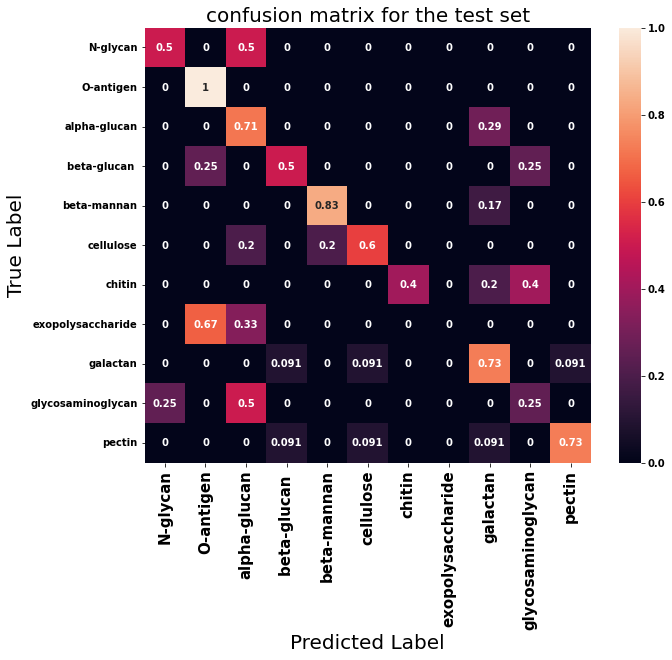

In [1220]:
# make the plot
plt.figure(figsize = (10, 8))
sns.heatmap(df_cm, annot = True)
plt.title("confusion matrix for the test set", fontsize = 20)
plt.xlabel("Predicted Label", fontsize = 20)
plt.ylabel("True Label", fontsize = 20)
plt.show()


#### LSTM for sequential feature extraction

In [1594]:
# Let's use the combined df which we have created by artificially reducing the noise within classes

In [1595]:
combined_df.shape

(443, 3)

In [1596]:
# need to get an idea about the lengths first

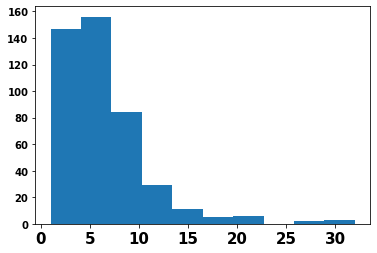

In [1597]:
plt.hist([len(seq.split(",")) for seq in combined_df["sig_gene_seq"].values])
plt.show()

In [1598]:
import tensorflow as tf

In [1599]:
# have an input layer
input_layer = tf.keras.layers.Input(shape = (), dtype = tf.string)

In [1600]:
len(np.unique([gene for seq in combined_df["sig_gene_seq"].values for gene in seq.split(",")]))

397

In [1601]:
from sklearn.preprocessing import LabelEncoder

In [1602]:
le = LabelEncoder()

In [1603]:
combined_df["high_level_substr"] = le.fit_transform(combined_df["high_level_substr"])

In [1604]:
X_train, X_test, y_train, y_test = train_test_split(combined_df[["sig_gene_seq"]],
                                                    combined_df["high_level_substr"], 
                                                   test_size = 0.3, stratify = combined_df["high_level_substr"])

In [1605]:
np.array(y_train.value_counts().cumsum())[-1]

310

In [1606]:
class_weights = dict(1/(y_train.value_counts()/np.array(y_train.value_counts().cumsum())[-1]))

In [1607]:
X_train_seq = [seq.replace(",", " ") for seq in X_train["sig_gene_seq"].values]

In [1608]:
X_test_seq = [seq.replace(",", " ") for seq in X_test["sig_gene_seq"].values]

In [1609]:
max_tokens = 40

In [1610]:
# pass this to a vectorization layer
# but first make a vectorization layer
text_vec_layer = tf.keras.layers.TextVectorization(max_tokens = max_tokens, output_mode = "int",
                                                  output_sequence_length=15, standardize = None)

In [1611]:
text_vec_layer.adapt(X_train_seq)

In [1612]:
# pass the input through this text vectorization layer
vectorized_text = text_vec_layer(input_layer)

In [1613]:
# instantiate an embedding layer
emb_layer = tf.keras.layers.Embedding(max_tokens, 32, mask_zero = True)

In [1614]:
# pass the vectorized text through the embedding layer
emb_output = emb_layer(vectorized_text)

In [1615]:
# instantiate a recurrent layer
gru_layer = tf.keras.layers.GRU(16)

In [1616]:
# pass the emb output through the gru
gru_output = gru_layer(emb_output)

In [1617]:
# classification layer
classification_layer = tf.keras.layers.Dense(len(np.unique(targets_train)))

In [1618]:
# class output
class_output = classification_layer(gru_output)

In [1619]:
# make the model
model = tf.keras.models.Model(input_layer, class_output)

In [1620]:
model.summary()

Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None,)]                 0         
_________________________________________________________________
text_vectorization_11 (TextV (None, 15)                0         
_________________________________________________________________
embedding_11 (Embedding)     (None, 15, 32)            1280      
_________________________________________________________________
gru_8 (GRU)                  (None, 16)                2400      
_________________________________________________________________
dense_11 (Dense)             (None, 6)                 102       
Total params: 3,782
Trainable params: 3,782
Non-trainable params: 0
_________________________________________________________________


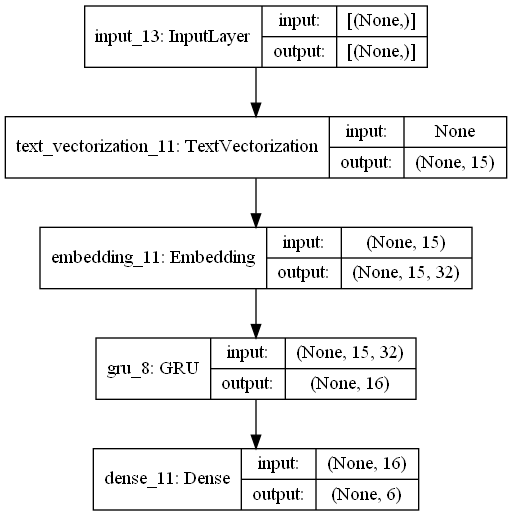

In [1621]:
tf.keras.utils.plot_model(model, show_shapes = True)

In [1622]:
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
             optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-3), 
             metrics=tf.keras.metrics.SparseCategoricalAccuracy())

In [1623]:
# fit the model
history = model.fit(X_train.values, np.array(y_train), verbose = 0, batch_size = 8, 
         validation_data = (X_test.values, np.array(y_test)), 
         epochs = 200, callbacks = tf.keras.callbacks.EarlyStopping(monitor = "val_sparse_categorical_accuracy", 
                                                                   patience = 50, mode = "max",
                                                                    restore_best_weights = True), 
         class_weight=class_weights)

In [1624]:
y_test = model.predict(X_test.values)

In [1625]:
y_test = np.argmax(y_test, axis = 1)

In [1626]:
y_test

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4], dtype=int64)

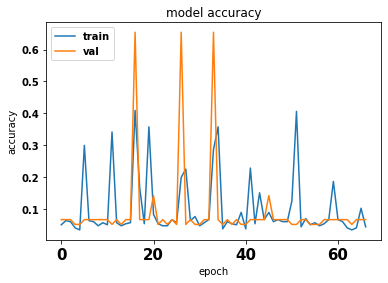

In [1627]:
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [1628]:
# very weird learning curves